## Importing Modules Required

In [64]:
import torch
import os
import numpy as np
import seaborn as sns
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torchvision import transforms, datasets,models
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

## Downloading the Data

In [3]:
## Downloading the Data
import urllib.request as request
data_url="https://download.pytorch.org/tutorial/hymenoptera_data.zip"

In [18]:
class Config:
    def __init__(self):
        self.ROOT_DATA_DIR ="hymenoptera_data"
        self.EPOCH=10
        self.BATCH_SIZE=32
        self.IMAGE_SIZE=(224,224)
        self.LEARNING_RATE=0.01
        self.DEVICE="cuda" if torch.cuda.is_available() else "cpu"
        print(f"this notebook is using device: {self.DEVICE}")
    def create_dir(self,dir_path):
        os.makedirs(dir_path,exist_ok=True)
        print(f"{dir_path} directory created successfully")


In [19]:
config=Config()
config.create_dir(dir_path=config.ROOT_DATA_DIR)

this notebook is using device: cuda
hymenoptera_data directory created successfully


In [7]:
data_zip_file ="data.zip"
data_zip_file_path = os.path.join(config.ROOT_DATA_DIR,data_zip_file)

request.urlretrieve(data_url,data_zip_file_path)

('hymenoptera_data\\data.zip', <http.client.HTTPMessage at 0x1c0e9e07148>)

## Unziping the Data

In [8]:
from zipfile import ZipFile
def unzip(source:str,dest:str)->None:
    print("Extraction Started")
    with ZipFile(source, "r") as zip_f:
        zip_f.extractall(dest)
    print("Extraction completed")   

In [9]:
unzip(data_zip_file_path,config.ROOT_DATA_DIR)

Extraction Started
Extraction completed


## Creating the DataLoader:

In [15]:
from pathlib import Path

In [42]:
train_path=Path("hymenoptera_data/hymenoptera_data/train")
test_path=Path("hymenoptera_data/hymenoptera_data/val")

#train_path="hymenoptera_data/hymenoptera_data/train"
#test_path="hymenoptera_data/hymenoptera_data/val"

 Wokring on Image

Mean of the each channel of the image<br />

for 28,28 img size:<br />

mean=sum(value of the pixel)/784<br />
std=(data-mean)/std

In [43]:
mean=torch.tensor([0.5,0.5,0.5])
std=torch.tensor([0.5,0.5,0.5])

In [44]:
train_transform=transforms.Compose([
    transforms.Resize(config.IMAGE_SIZE),
    transforms.RandomRotation(degrees=20),
    transforms.ToTensor(),
    transforms.Normalize(mean,std)

])

test_transform=transforms.Compose([
    transforms.Resize(config.IMAGE_SIZE),
    #transforms.RandomRotation(degree=20),
    transforms.ToTensor(),
    transforms.Normalize(mean,std)

])

In [45]:
train_data=datasets.ImageFolder(root=train_path,
transform=train_transform)

test_data=datasets.ImageFolder(root=test_path,
transform=test_transform)



In [47]:
train_data.class_to_idx

{'ants': 0, 'bees': 1}

In [49]:
label_map=train_data.class_to_idx

In [51]:
train_data

Dataset ImageFolder
    Number of datapoints: 244
    Root location: hymenoptera_data\hymenoptera_data\train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
               RandomRotation(degrees=[-20.0, 20.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
               Normalize(mean=tensor([0.5000, 0.5000, 0.5000]), std=tensor([0.5000, 0.5000, 0.5000]))
           )

In [53]:
test_data 

Dataset ImageFolder
    Number of datapoints: 153
    Root location: hymenoptera_data\hymenoptera_data\val
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=tensor([0.5000, 0.5000, 0.5000]), std=tensor([0.5000, 0.5000, 0.5000]))
           )

In [54]:
train_loader=DataLoader(train_data,
                        shuffle=True,
                        batch_size=config.BATCH_SIZE,
)

test_loader=DataLoader(test_data,
                        #shuffle=True,
                        batch_size=config.BATCH_SIZE,
)

In [55]:
data=next(iter(train_loader))

In [57]:
len(data)

2

In [58]:
images,labels=data

In [59]:
images.shape,labels.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

### Vizualization of  single image

In [60]:
img=images[0]
img.shape

torch.Size([3, 224, 224])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 223.5, 223.5, -0.5)

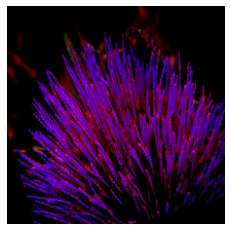

In [63]:
# we need to give the shape as (channel,height,width)
plt.imshow(img.permute(1,2,0))
plt.axis("off")

## Download and use Pre-Trained Model(ALex Net) for Transfer Learning

AlexNet